In [170]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from bnn import BNNBayesbyBackprop, gauss_logpdf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
X = pd.read_csv('data/smallTrainCleaned.csv')
y = pd.read_csv('data/y_labels.csv', header=None)
y[y == -1] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [172]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [173]:
y_train.shape

(40000,)

In [175]:
bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=100, linear_regression=True, preset=False, classification=True, input_dim=38)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1e-2, batch_size=1000)

Data being saved in following file:
logging.csv
Epoch:  0 	Loss:  316324.34 	acc:  0.4904
Epoch:  1 	Loss:  294325.7 	acc:  0.1199
Epoch:  2 	Loss:  300157.0 	acc:  0.59295
Epoch:  3 	Loss:  290549.06 	acc:  0.730975
Epoch:  4 	Loss:  278995.2 	acc:  0.9023
Epoch:  5 	Loss:  274816.3 	acc:  0.962625
Epoch:  6 	Loss:  259880.5 	acc:  0.409225
Epoch:  7 	Loss:  232963.05 	acc:  0.98075
Epoch:  8 	Loss:  237434.06 	acc:  0.89765
Epoch:  9 	Loss:  224855.1 	acc:  0.13035
Epoch:  10 	Loss:  205353.52 	acc:  0.85545
Epoch:  11 	Loss:  180097.22 	acc:  0.786625
Epoch:  12 	Loss:  154698.19 	acc:  0.97175
Epoch:  13 	Loss:  140213.22 	acc:  0.80455


KeyboardInterrupt: 

In [75]:
np.isnan(X_train).any()


False

In [78]:


y_train[(y_train != 0) & (y_train != 1)]

array([-1, -1, -1, ..., -1, -1, -1])

In [81]:
y_train[y_train == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [124]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4789

In [125]:
preds = lr.predict(X_test)
# confusion_matrix(y_test, preds)
precision_score(y_test, preds)

0.021466565349544074

In [126]:
recall_score(y_test, preds)

0.653179190751445

In [119]:
y_test[y_test == 1].shape[0] / y_test[y_test == 0].shape[0] 

0.01760455886842373

In [127]:
y_test[y_test == 1].shape[0]

173

In [128]:
confusion_matrix(y_test, preds)


array([[4676, 5151],
       [  60,  113]])

In [111]:
np.isnan(y).astype(int).sum()

0    0
dtype: int64

In [113]:
y = y.to_numpy()

In [118]:
y[y ==0].shape[0]

(49110,)

In [139]:
X_toy[:,0] > 9

array([False, False,  True, ..., False, False, False])

In [154]:
X_toy = np.random.uniform(-10, 10, (5000, 2))
y_toy = np.zeros(X_toy.shape[0])
y_toy[X_toy[:,0] > 0] = 1
print(X_toy[X_toy[:,0] > 9])
print(y_toy)

[[ 9.4612076  -7.98423436]
 [ 9.36505044 -6.60489122]
 [ 9.5102388   8.35842172]
 [ 9.61898495  3.42591915]
 [ 9.71026683 -5.67810617]
 [ 9.23841086  6.51317567]
 [ 9.42640497 -1.0176572 ]
 [ 9.7857565  -0.52367214]
 [ 9.92158436  4.28678326]
 [ 9.13796458 -4.89280723]
 [ 9.89988782  3.08963105]
 [ 9.17622911  4.33702406]
 [ 9.35171783  2.10345286]
 [ 9.44971082  4.97959766]
 [ 9.71842134  2.71896651]
 [ 9.74794055  2.97106655]
 [ 9.51665512 -2.73105866]
 [ 9.49767072  8.48430903]
 [ 9.31638517 -2.21039005]
 [ 9.62894365 -5.40867976]
 [ 9.40587597 -6.58062797]
 [ 9.00698142  3.93684372]
 [ 9.61572032  2.07215793]
 [ 9.4343037   0.26925859]
 [ 9.3157381  -0.98626546]
 [ 9.97681496  1.18294783]
 [ 9.04432775 -6.65964969]
 [ 9.61914225 -4.78708475]
 [ 9.3098394   5.39033509]
 [ 9.56394897 -4.99675407]
 [ 9.19844038  1.50908014]
 [ 9.59415166  5.20886938]
 [ 9.1905281   7.95289821]
 [ 9.61958961 -6.91916836]
 [ 9.39704071 -3.5281518 ]
 [ 9.22342435 -6.59211486]
 [ 9.15403002 -3.5880211 ]
 

input_dim:  2
Data being saved in following file:
logging.csv
Epoch:  0 	Loss:  14971431.0 	MAE:  3.0426614
Epoch:  1 	Loss:  17160134.0 	MAE:  8.388664
Epoch:  2 	Loss:  15540844.0 	MAE:  9.913533
Epoch:  3 	Loss:  16641569.0 	MAE:  4.9475875
Epoch:  4 	Loss:  12625564.0 	MAE:  4.3398924
Epoch:  5 	Loss:  16091138.0 	MAE:  4.2442455
Epoch:  6 	Loss:  14443296.0 	MAE:  7.0217314
Epoch:  7 	Loss:  14533060.0 	MAE:  4.956892
Epoch:  8 	Loss:  13907706.0 	MAE:  7.6038423
Epoch:  9 	Loss:  14948668.0 	MAE:  9.094907
Epoch:  10 	Loss:  16398707.0 	MAE:  4.697731
Epoch:  11 	Loss:  14351789.0 	MAE:  4.581734
Epoch:  12 	Loss:  13030878.0 	MAE:  5.277932
Epoch:  13 	Loss:  13720167.0 	MAE:  10.914837
Epoch:  14 	Loss:  14272938.0 	MAE:  3.3739114
Epoch:  15 	Loss:  458765300.0 	MAE:  7.021416
Epoch:  16 	Loss:  447236320.0 	MAE:  9.059294
Epoch:  17 	Loss:  417845920.0 	MAE:  6.1877975
Epoch:  18 	Loss:  442040450.0 	MAE:  7.140801
Epoch:  19 	Loss:  445156350.0 	MAE:  8.374039


/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project/bnn.py:11: RuntimeWarning: invalid value encountered in greater_equal
  if (normalized_x.detach().numpy() >= float('inf')).any():


Epoch:  20 	Loss:  nan 	MAE:  nan
Epoch:  21 	Loss:  nan 	MAE:  nan
Epoch:  22 	Loss:  nan 	MAE:  nan
Epoch:  23 	Loss:  nan 	MAE:  nan
Epoch:  24 	Loss:  nan 	MAE:  nan
Epoch:  25 	Loss:  nan 	MAE:  nan
Epoch:  26 	Loss:  nan 	MAE:  nan
Epoch:  27 	Loss:  nan 	MAE:  nan
Epoch:  28 	Loss:  nan 	MAE:  nan
Epoch:  29 	Loss:  nan 	MAE:  nan
Epoch:  30 	Loss:  nan 	MAE:  nan
Epoch:  31 	Loss:  nan 	MAE:  nan
Epoch:  32 	Loss:  nan 	MAE:  nan
Epoch:  33 	Loss:  nan 	MAE:  nan
Epoch:  34 	Loss:  nan 	MAE:  nan
Epoch:  35 	Loss:  nan 	MAE:  nan
Epoch:  36 	Loss:  nan 	MAE:  nan
Epoch:  37 	Loss:  nan 	MAE:  nan
Epoch:  38 	Loss:  nan 	MAE:  nan
Epoch:  39 	Loss:  nan 	MAE:  nan
Epoch:  40 	Loss:  nan 	MAE:  nan
Epoch:  41 	Loss:  nan 	MAE:  nan
Epoch:  42 	Loss:  nan 	MAE:  nan
Epoch:  43 	Loss:  nan 	MAE:  nan
Epoch:  44 	Loss:  nan 	MAE:  nan
Epoch:  45 	Loss:  nan 	MAE:  nan
Epoch:  46 	Loss:  nan 	MAE:  nan
Epoch:  47 	Loss:  nan 	MAE:  nan
Epoch:  48 	Loss:  nan 	MAE:  nan
Epoch:  49 	Lo

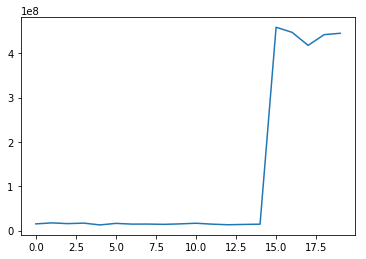

In [155]:
bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=30, linear_regression=True, preset=False, classification=False, input_dim=2)
bnn.fit(X_toy, y_toy, plot=True, n_epochs=75, learning_rate=1e-3, batch_size=1000)

In [153]:
df = pd.read_csv("logging.csv")
df = df.drop(['w2_1', 'w2_2', 'b_2', 'w2_1_grad', 'w2_2_grad'], axis=1)
df

,w1_1,w1_2,w1_1_grad,w1_2_grad,b_1,b_1_grad,b_2_grad,log_prior,log_posterior,mean_likelihood
0,0.138492,-0.043693,-677.736500,-0.105935,0.024025,415.05698,-0.173286,-8.646632,-8.491198,-2871.785677
1,0.139479,-0.042693,-537.374600,-0.107825,0.023025,409.23618,0.143933,-8.381437,-8.200098,-2886.485417
2,0.140469,-0.041887,-577.263100,-0.610362,0.022025,422.21622,0.032742,-9.078981,-8.843579,-3126.743750
3,0.141302,-0.041361,-41.503240,0.132136,0.021024,418.70350,-0.095046,-8.364523,-8.167536,-3153.332292
4,0.142184,-0.040892,-597.483500,-0.029016,0.020021,439.29562,0.231250,-7.984054,-7.868133,-2531.938281
5,0.142961,-0.040293,-38.038180,-0.330749,0.019021,405.28262,0.034687,-8.742422,-8.476561,-2684.448438
6,0.143790,-0.039643,-563.598200,-0.225799,0.018021,418.79898,0.257804,-9.186697,-8.891592,-3267.948698
7,0.144550,-0.039261,-79.459470,0.257974,0.017018,440.33044,0.405441,-8.715026,-8.598409,-3034.774479
8,0.145340,-0.038923,-419.161740,0.002739,0.016019,400.96255,-0.049325,-8.963928,-8.860149,-3651.906250
9,0.146100,-0.038620,-173.408500,-0.002803,0.015019,422.01860,0.218190,-8.680138,-8.515354,-2787.944531


In [165]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
X_train[:int(dataset_size/2),0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[:int(dataset_size/2), 1] = np.random.normal(loc=-5, 
                                                    scale=1, 
                                                    size=(int(dataset_size/2),))
y_train[:int(dataset_size/2)] = 0

X_train[int(dataset_size/2):,0] = np.random.normal(loc=0,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
X_train[int(dataset_size/2):, 1] = np.random.normal(loc=5,
                                                    scale=1,
                                                    size=(int(dataset_size/2),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

Data being saved in following file:
logging.csv
Epoch:  0 	Loss:  6693.56 	acc:  0.966
Epoch:  1 	Loss:  4897.3887 	acc:  1.0
Epoch:  2 	Loss:  4959.336 	acc:  0.0
Epoch:  3 	Loss:  3822.735 	acc:  0.9252
Epoch:  4 	Loss:  3060.7334 	acc:  0.9376
Epoch:  5 	Loss:  3857.6797 	acc:  0.9996
Epoch:  6 	Loss:  2974.9458 	acc:  0.998
Epoch:  7 	Loss:  2414.552 	acc:  1.0
Epoch:  8 	Loss:  1891.903 	acc:  1.0
Epoch:  9 	Loss:  1303.2712 	acc:  0.9656
Epoch:  10 	Loss:  1606.8391 	acc:  0.7826
Epoch:  11 	Loss:  1287.3357 	acc:  0.0708
Epoch:  12 	Loss:  1143.8702 	acc:  1.0
Epoch:  13 	Loss:  1087.5385 	acc:  0.7472
Epoch:  14 	Loss:  899.7684 	acc:  0.9998
Epoch:  15 	Loss:  1072.9089 	acc:  1.0
Epoch:  16 	Loss:  983.24164 	acc:  1.0
Epoch:  17 	Loss:  786.44275 	acc:  1.0
Epoch:  18 	Loss:  665.1627 	acc:  1.0
Epoch:  19 	Loss:  645.5856 	acc:  1.0
Epoch:  20 	Loss:  534.66876 	acc:  1.0
Epoch:  21 	Loss:  640.41296 	acc:  1.0
Epoch:  22 	Loss:  471.17853 	acc:  1.0
Epoch:  23 	Loss:  332.

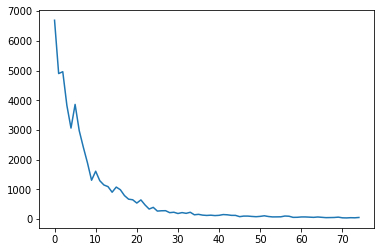

In [168]:
bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=30, linear_regression=True, preset=False, classification=True, input_dim=2)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1e-2, batch_size=1000)

In [161]:
W = np.array([-10, 10]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 0.3]).reshape(-1, 1)
print(W_s)
b_s = 0.1

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  y_train[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))



print(y_train)

[[0. ]
 [0.3]]
0.1
[[  9.95293375]
 [ 38.79069985]
 [-65.24593269]
 ...
 [-79.93915925]
 [-18.69534254]
 [-74.1674691 ]]


input_dim:  2
Data being saved in following file:
logging.csv
Epoch:  0 	Loss:  855162000.0 	MAE:  49.99776
Epoch:  1 	Loss:  870236500.0 	MAE:  53.1579
Epoch:  2 	Loss:  868457400.0 	MAE:  50.17365
Epoch:  3 	Loss:  846506900.0 	MAE:  45.173042
Epoch:  4 	Loss:  858328770.0 	MAE:  60.033108
Epoch:  5 	Loss:  863716700.0 	MAE:  49.275055
Epoch:  6 	Loss:  850691460.0 	MAE:  50.327698
Epoch:  7 	Loss:  830452200.0 	MAE:  48.522823
Epoch:  8 	Loss:  848222100.0 	MAE:  48.067677
Epoch:  9 	Loss:  863312000.0 	MAE:  49.250755
Epoch:  10 	Loss:  866392640.0 	MAE:  55.357388
Epoch:  11 	Loss:  839693060.0 	MAE:  48.596806
Epoch:  12 	Loss:  829836350.0 	MAE:  48.042908
Epoch:  13 	Loss:  867969900.0 	MAE:  47.748524
Epoch:  14 	Loss:  835277600.0 	MAE:  43.61436
Epoch:  15 	Loss:  23102350000.0 	MAE:  51.690266
Epoch:  16 	Loss:  21817364000.0 	MAE:  57.230686
Epoch:  17 	Loss:  22883805000.0 	MAE:  45.5243
Epoch:  18 	Loss:  23456514000.0 	MAE:  52.84144
Epoch:  19 	Loss:  21822583000.0 	MA

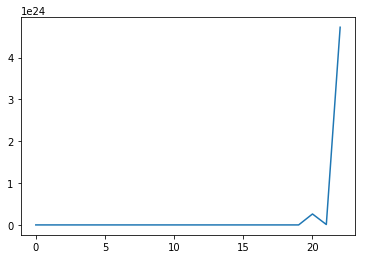

In [163]:
bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=30, linear_regression=True, preset=False, classification=False, input_dim=2)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1e-3, batch_size=1000)